<a href="https://colab.research.google.com/github/rodrigorochag/CNN_Classifier_Pytorch/blob/main/cnn_pytorch_vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.nn.functional as F
import os
from collections import Counter

import matplotlib.pyplot as plt
import random

In [2]:
# Install the Kaggle library
!pip install -q kaggle

# Set Kaggle credentials
import json
import os

# Replace the following with your Kaggle username and API key

kaggle_info = {
    "username": "user_kaggle",
    "key": "api_key"
}
# Save Kaggle credentials to a JSON file
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_info, file)

# Change the permissions of the file
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
# Unzip the dataset
!unzip -q /content/vegetable-image-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 96% 512M/534M [00:05<00:00, 72.9MB/s]
100% 534M/534M [00:05<00:00, 99.8MB/s]


In [3]:
train_dataset = '/content/Vegetable Images/train'
test_dataset= '/content/Vegetable Images/test'
validation_dataset = '/content/Vegetable Images/validation'

In [4]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder


#train and test data directory
# train_dataset = '/content/Vegetable Images/train'
# test_dataset= '/content/Vegetable Images/test'
# validation_dataset = '/content/Vegetable Images/validation'


#load the train and test data
train_dataset = ImageFolder(train_dataset,transform = transforms.Compose([
    transforms.Resize((224,224)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_dataset,transforms.Compose([
    transforms.Resize((224,224)),transforms.ToTensor()
]))

validation_dataset = ImageFolder(validation_dataset,transforms.Compose([
    transforms.Resize((224,224)),transforms.ToTensor()
]))

In [5]:
img, label = train_dataset[0]
print(img.shape,label)


torch.Size([3, 224, 224]) 0


In [6]:
print("Follwing classes are there : \n",train_dataset.classes)


Follwing classes are there : 
 ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


Label : Bean


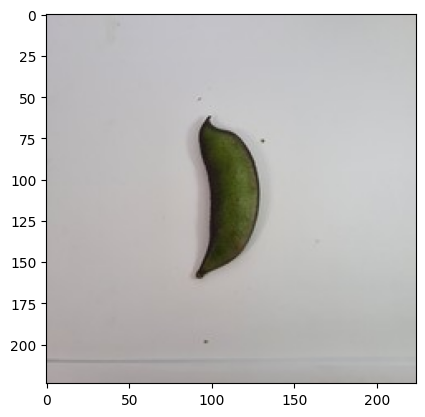

In [7]:
def display_img(img,label):
    print(f"Label : {train_dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))

#display the first image in the dataset
display_img(*train_dataset[0])

In [8]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = 2000
train_size = len(train_dataset) - val_size

train_dataset,validation_dataset = random_split(train_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_dataset)}")
print(f"Length of Validation Data : {len(validation_dataset)}")

#output
#Length of Train Data : 12034
#Length of Validation Data : 2000

#load the train and validation into batches.
train_dl = DataLoader(train_dataset, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(validation_dataset, batch_size*2, num_workers = 4, pin_memory = True)

Length of Train Data : 13000
Length of Validation Data : 2000


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [10]:
train_dataset # tensor completo sem batches